In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime 

def parse_date(dates):
    return [
        datetime.strptime(f"{d}", '%b-%y') if isinstance(d, str) 
        else float("nan") 
        for d in dates
    ]

sub = pd.read_csv(
    "user_subscriptions.csv",
    parse_dates=["Join Date", "End Date"],
    date_parser=parse_date
)

sub['Tenure'] = sub['End Date'] - sub['Join Date']

def compute_age(row):
    return row["Join Date"].year - row["BirthYear"]

sub["age"] = sub["Join Date"].dt.year - sub["BirthYear"]

sub["age_band"] = pd.cut(
    sub["age"], 
    bins=(18, 25, 35, 45, 55, 99), 
    labels=["18-24", "25-34", "35-44", "45-54", "55+"],
    include_lowest=True
)

# Impact of price increase on customer segments

The hypothesis is that with the price increase of 2016 the mix of segments that OC&Gym attracts changes, as acquiring a membership requires more affluence. To verify this hypothesis, we looked at the composition of affluence groups that joined OC&Gym shortly before the price increase and shortly after. Upon visual inspection of the bar plot, it becomes evident that the composition of affluence groups did not significantly change after the price increase.

In [2]:
def _plot(gb, labels, x, y, title):
    g = (
        gb.groupby(x)[y]
            .value_counts(normalize=True) 
            .mul(100)
            .rename('percent')
            .reset_index()
            .pipe((sns.catplot,"data"), x=x,y='percent',hue=y,kind='bar')
    )


    for ax in g.axes.ravel():
        ax.set_xticklabels(labels, rotation=40,
                           horizontalalignment='right', 
                           fontweight='light', 
                           fontsize=11)

    plt.title(title)
    plt.show()

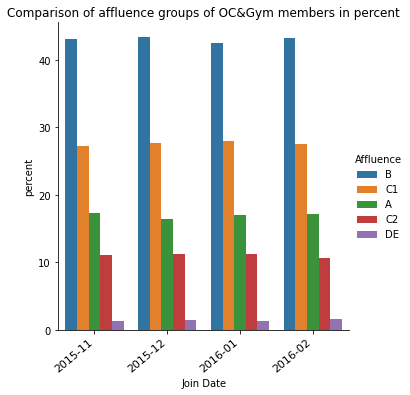

In [3]:
#Affluence

startdate = sub[(sub['Join Date']>='2015-11-01')&(sub['Join Date']<'2016-03-01')]
labels= ["2015-11", "2015-12", "2016-01", "2016-02"]
x,y = "Join Date", "Affluence"

_plot(startdate, labels, x, y, "Comparison of affluence groups of OC&Gym members in percent")

Additionally, we also looked at the composition of age groups and the gender mix, shortly before and after the price increase. It is however important to note, that price discrimination based on age or gender is not advisable, as it increases legal and reputational risks. If such a price discrimination is to be considered by the OC&Gym leadership team, counsel should be sought with legal experts. Upon inspecting the two bar plots, we can see that the composition of age groups and gender groups did not significantly change after the price increase.

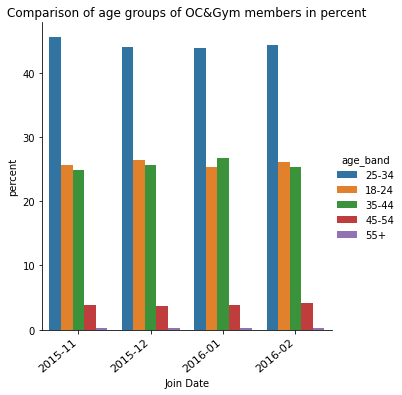

In [4]:
#Age
startdate = sub[(sub['Join Date']>='2015-11-01')&(sub['Join Date']<'2016-03-01')]
labels= ["2015-11", "2015-12", "2016-01", "2016-02"]

x,y = "Join Date", "age_band"

_plot(startdate, labels, x, y, "Comparison of age groups of OC&Gym members in percent")

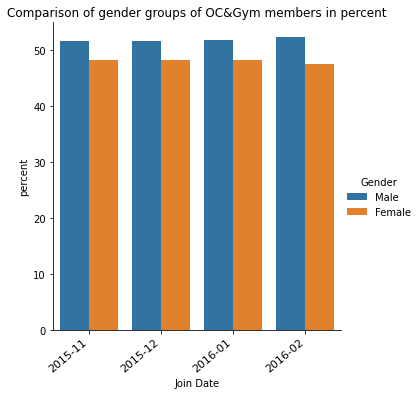

In [5]:
#Gender
startdate = sub[(sub['Join Date']>='2015-11-01')&(sub['Join Date']<'2016-03-01')]
labels= ["2015-11", "2015-12", "2016-01", "2016-02"]
x,y = "Join Date", "Gender"

_plot(startdate, labels, x, y, "Comparison of gender groups of OC&Gym members in percent")

Our conclusion is therefore that OC&Gym did not attract different customers mix after the price increase.

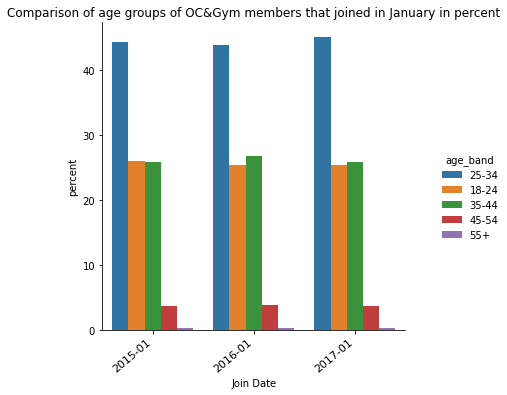

In [6]:
#Comparison 2015/2016/2017
startdate = sub[(sub['Join Date']=='2015-01-01')|(sub['Join Date']=='2016-01-01')|(sub['Join Date']=='2017-01-01')]
labels= ["2015-01", "2016-01", "2017-01"]

x,y = "Join Date", "age_band"

_plot(startdate, labels, x, y, "Comparison of age groups of OC&Gym members that joined in January in percent")

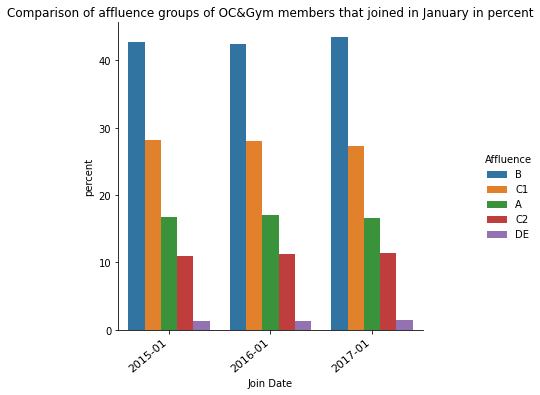

In [7]:
#Comparison 2015/2016/2017
startdate = sub[(sub['Join Date']=='2015-01-01')|(sub['Join Date']=='2016-01-01')|(sub['Join Date']=='2017-01-01')]
labels= ["2015-01", "2016-01", "2017-01"]
x,y = "Join Date", "Affluence"

_plot(startdate, labels, x, y, "Comparison of affluence groups of OC&Gym members that joined in January in percent")

# Pricing change should not have been applied to existing members

The price increase of 2016 was applied to existing members as well as to new members. Existing members were given the option to extraordinarily terminate their subscription in 2015. From the bar plot we can see, that there were a lot of cancelations in December 2015.

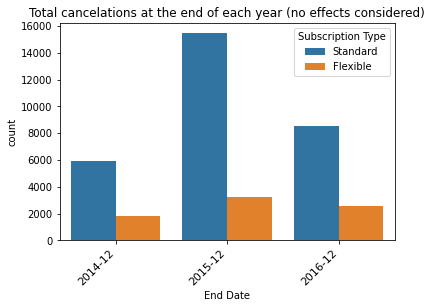

In [8]:
enddate = sub[((sub['End Date']>'2014-11-30')& (sub['End Date']<='2014-12-31'))|((sub['End Date']>'2015-11-30')& (sub['End Date']<='2015-12-31'))|((sub['End Date']>'2016-11-30')& (sub['End Date']<='2016-12-31'))]

labels= ["2014-12", "2015-12", "2016-12"]

ax = sns.countplot(enddate["End Date"], hue=enddate["Subscription Type"])
ax.set(xlabel='End Date', ylabel='count')
ax.set_xticklabels(labels, 
                   rotation=45,
                   horizontalalignment='right', 
                   fontweight='light', 
                   fontsize=11
                  )
plt.title("Total cancelations at the end of each year (no effects considered)")
plt.show()

In [9]:
ed = enddate

In [10]:
fend=sub[(sub['End Date']>'2014-11-30')& (sub['End Date']<='2014-12-31')]
fend=fend["CustomerID"].value_counts().sum()
send=sub[(sub['End Date']>'2015-11-30')& (sub['End Date']<='2015-12-31')]
send=send["CustomerID"].value_counts().sum()
seend=sub[(sub['End Date']>'2016-11-30')& (sub['End Date']<='2016-12-31')]
seend=seend["CustomerID"].value_counts().sum()

ftot=sub[(sub["End Date"]>"2014-12-31") & (sub['Join Date']<='2014-12-31')]
ftot= ftot["CustomerID"].value_counts().sum()
stot=sub[(sub["End Date"]>"2015-12-31") & (sub['Join Date']<='2015-12-31')]
stot=stot["CustomerID"].value_counts().sum()
setot=sub[(sub["End Date"]>"2016-12-31") & (sub['Join Date']<='2016-12-31')]
setot=setot["CustomerID"].value_counts().sum()

termination_comp = pd.DataFrame()
data = pd.DataFrame({"Termination in Dec. divided by total population": [int(round(fend/ftot*100)), int(round(send/stot*100)), int(round(seend/setot*100))],\
                    "Year": ["2014-12", "2015-12", "2016-12"]})
termination_comp=termination_comp.append(data)

However, to better determine the effect of the price increase on membership terminations, we look at the termination rates in December 2014 and 2016. To make a comparison in relative terms, we divide the terminations in December of the respective year, by the number of active members at the time. On the bar plot below, we can inspect that more than 60% of members (at the time) terminated their contract, which is more than double the terminations in relative terms in December 2014 and 2016 respectively. 

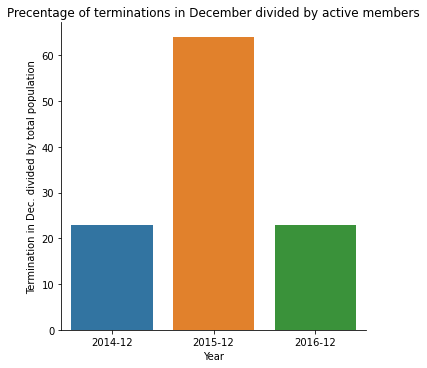

In [11]:
ax = sns.catplot(y="Termination in Dec. divided by total population", x="Year", kind="bar", data=termination_comp)
plt.title("Precentage of terminations in December divided by active members")
plt.show()

By taking the average termination rate in December of the years 2014 and 2016, we can approximate the effect of the price increase on terminations. According to this calculation 9923 members with a standard subscription and 2274 members with a flexible contract terminated their contract due to the price increase.

In [12]:
#Average terminations in december for 2014 and 2016
avg_14_16=(fend/ftot*100+seend/setot*100)/2 
avg_15=send/stot*100

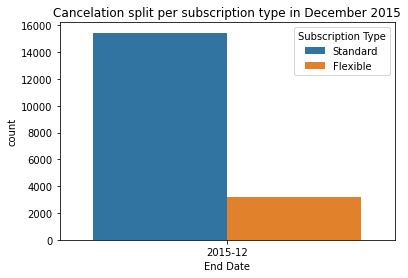

In [13]:
enddate = sub[(sub['End Date']>='2015-12-01')&(sub['End Date']<'2016-01-01')]
label = ["2015-12"]
ax = sns.countplot(enddate["End Date"], hue=enddate["Subscription Type"])
ax.set(xlabel='End Date', ylabel='count')
ax.set_xticklabels(label)
plt.title("Cancelation split per subscription type in December 2015")
plt.show()

In [14]:
#Attempt to sperate effect of price increase on termination in Dec. 2015
stand=enddate[enddate["Subscription Type"]=="Standard"].count()
flex=enddate[enddate["Subscription Type"]=="Flexible"].count()

In [15]:
diff_stand = stand["CustomerID"] - round(stand["CustomerID"]/avg_15*avg_14_16)
diff_flex = flex["CustomerID"] - round(flex["CustomerID"]/avg_15*avg_14_16)

In [23]:
print(f"According to our approximation {diff_stand:.0f} of standard subscriptions and {diff_flex:.0f} of flexible subscriptions were terminated due to the price increase.")

According to our approximation 9923 of standard subscriptions and 2074 of flexible subscriptions were terminated due to the price increase.


From Appendix 1 we took the customer lifetime value for standard and flex members and multiply it with the daily cost of a standard or flex membership to approximate the lost revenues due to applying the pricing change to the existing OC&Gym members.

In [17]:
stand_cost_per_day = 26.99/30
flex_cost_per_day = 30.99/30

In [18]:
print(f"If we make the assumption, that the members that terminated their contract in December 2015 would have stayed for an average duration, we can quantify the lost revenues. According to this approximation, OC&Gym lost out on {9923*135.76*stand_cost_per_day:.2f}£ and {2074*93.91*flex_cost_per_day:.2f}£ respectivley, which amounts to lost revenues of {9923*135.76*stand_cost_per_day+2074*93.91*flex_cost_per_day:.2f}£.")

If we make the assumption, that the members that terminated their contract in December 2015 would have stayed for an average duration, we can quantify the lost revenues. According to this approximation, OC&Gym lost out on 1211982.78£ and 201196.73£ respectivley, which amounts to lost revenues of 1413179.51£.
